# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [9]:
professions = ['Python разработчик', 'C++ программист', 'Веб-дизайнер', 'Официант', 'Уборщик']

vacancies = {}

for prof in professions:
    vacancies[prof] = []
    page = 0
    while True:
        URL = 'https://api.hh.ru/vacancies'
        params = {
            'text': prof,
            'area': 1,
            'page': page,
            'per_page': 100
        }
        data = requests.get(URL, params).json()
        vacancies[prof].extend(data['items'])
        if page >= data['pages'] - 1:
            break
        page += 1


(1 балл) Посчитайте сколько всего найдено вакансий:

In [10]:
total_vacancies = sum([len(vacancies[prof]) for prof in professions])
total_vacancies

7301

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [11]:
class Company:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [24]:
companies = []
for prof in professions:
    for vacancy in vacancies[prof]:
        if vacancy['address'] and vacancy['address']['lat'] and vacancy['address']['lng']:
            name = vacancy['employer']['name']
            lat = vacancy['address']['lat']
            lon = vacancy['address']['lng']
            if Company(name, lat, lon) not in companies:
                companies.append(Company(name, lat, lon))


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [61]:
vacancies_with_coordinates = sum([1 for prof in professions for vacancy in vacancies[prof] if vacancy['address'] and vacancy['address']['lat'] and vacancy['address']['lng']])
print(vacancies_with_coordinates)

4608


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [63]:
mkad = []
for prof in professions:
    for vacancy in vacancies[prof]:
        if vacancy['address'] and vacancy['address']['lat'] and vacancy['address']['lng']:
            lat = vacancy['address']['lat']
            lng = vacancy['address']['lng']
            if 55.55 <= lat <= 55.91 and 37.34 <= lng <= 37.86:
                mkad.append(vacancy)


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

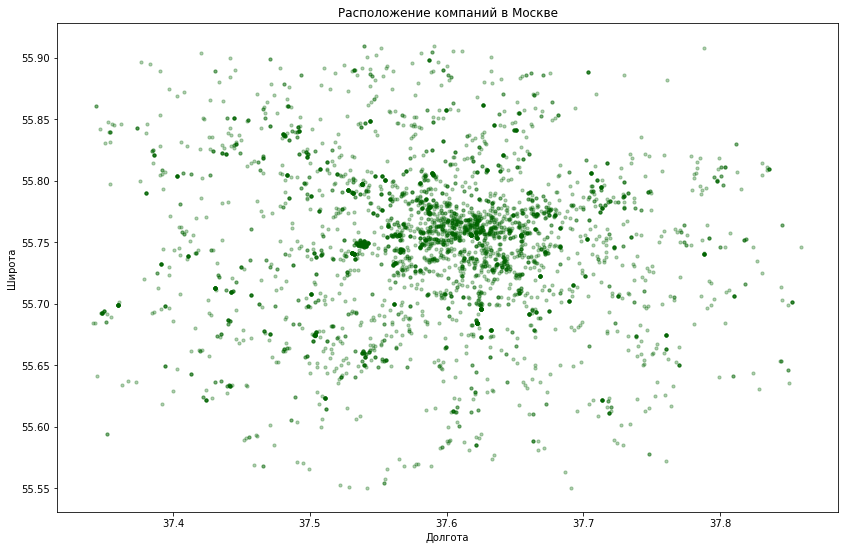

In [64]:
plt.figure(figsize=(14, 9))
for company in mkad:
    plt.scatter(company['address']['lng'], company['address']['lat'], alpha=0.3, s=10, color='darkgreen')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение компаний в Москве')
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [65]:
df = pd.DataFrame(mkad)
df = df[['name', 'address']]
df['lat'] = df['address'].apply(lambda x: x['lat'])
df['lng'] = df['address'].apply(lambda x: x['lng'])

import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="lng", zoom=9)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_center={
                  "lat": df['lat'].mean(), "lon": df['lng'].mean()})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

1. Большая часть вакансий сосредоточена в центре Москвы
2. По количеству вакансий можно понять, что конкуренция на рынке труда Москвы - очень высокая

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [66]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

zsh:1: command not found: gdown


Создадим DataFrame:

In [85]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [68]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [69]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [74]:
max_price = diamonds['total_sales_price'].max()
min_price = diamonds['total_sales_price'].min()
max_index = diamonds[diamonds['total_sales_price'] == max_price].index[0]
min_index = diamonds[diamonds['total_sales_price'] == min_price].index[0]
print(f"макс. цена: {max_index}: {max_price}")
print(f"мин. цена: {min_index}: {min_price}")


макс. цена: 219702: 1449881
мин. цена: 0: 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [71]:
diamonds.isin(["unknown", "None"]).sum().sum()

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [72]:
cols_with_na = diamonds.columns[diamonds.isin(["unknown", "None"]).any()].tolist()
cols_with_na

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [81]:
fancy_columns = [col for col in diamonds.columns if col.startswith('fancy_color_')]
fluor_columns = [col for col in diamonds.columns if col.startswith('fluor_')]
len(fancy_columns), len(fluor_columns)

(4, 2)

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [80]:
num_fancy_color_values = diamonds[fancy_columns].count().sum()
num_fluor_values = diamonds[fluor_columns].count().sum()
num_fancy_color_values, num_fluor_values

(878812, 439406)

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [86]:
diamonds.drop(fancy_columns + fluor_columns, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [87]:
culet_cols = [col for col in diamonds.columns if col.startswith('culet_')]
print(len(culet_cols))
print(diamonds[culet_cols].count().sum())
diamonds.drop(culet_cols, axis=1, inplace=True)

2
439406


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [94]:
total_price = diamonds['total_sales_price'].sum()
total_price /= 1000
total_price

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [95]:
even = diamonds.iloc[::2]
even

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [96]:
six_rows = diamonds[diamonds.index % 6 == 0]
six_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [97]:
categorical_features = diamonds.select_dtypes(include=['object'])
categorical_features

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [106]:
price_col = diamonds['total_sales_price']
result = price_col * price_col.T
print(result)

0                 40000
1                 40000
2                 40000
3                 40000
4                 40000
              ...      
219698    1465775118864
219699    1670556250000
219700    1730529726016
219701    1822500000000
219702    2102154914161
Name: total_sales_price, Length: 219703, dtype: int64


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

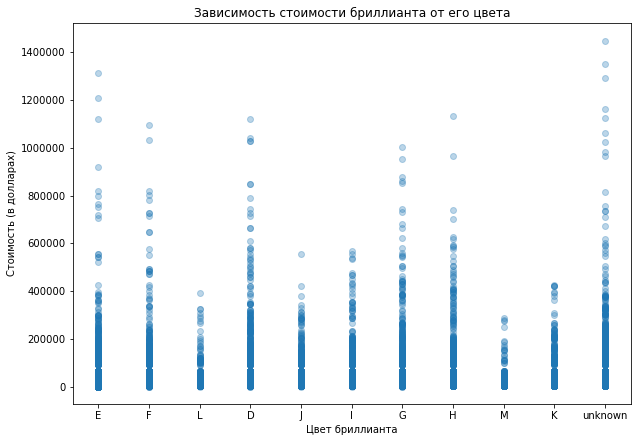

In [114]:
plt.figure(figsize=(10, 7))
cleaned = diamonds.dropna(subset=['color', 'total_sales_price'])
plt.scatter(cleaned['color'], cleaned['total_sales_price'], alpha=0.3)
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость стоимости бриллианта от его цвета')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

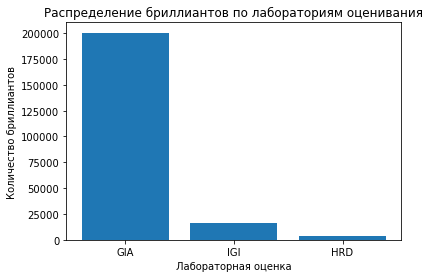

In [115]:
cleaned = diamonds.dropna(subset=['lab'])
lab_count = cleaned['lab'].value_counts()
plt.bar(lab_count.index, lab_count.values)
plt.xlabel('Лабораторная оценка')
plt.ylabel('Количество бриллиантов')
plt.title('Распределение бриллиантов по лабораториям оценивания')
plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

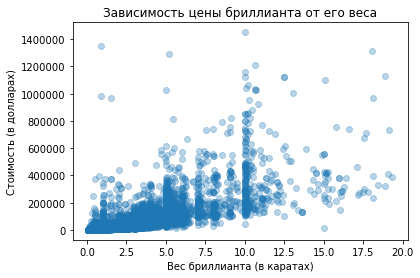

In [118]:
cleaned = diamonds.dropna(subset=['carat_weight', 'total_sales_price'])
plt.scatter(cleaned['carat_weight'], cleaned['total_sales_price'], alpha=0.3)
plt.xlabel('Вес бриллианта (в каратах)')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость цены бриллианта от его веса')
plt.show()


(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

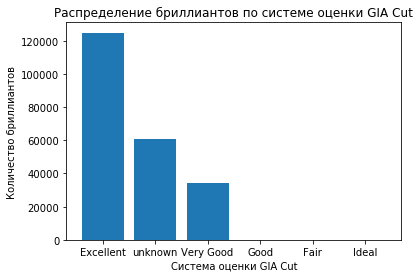

In [119]:
cleaned = diamonds.dropna(subset=['cut_quality'])
cut_count = cleaned['cut_quality'].value_counts()
plt.bar(cut_count.index, cut_count.values)
plt.xlabel('Система оценки GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.title('Распределение бриллиантов по системе оценки GIA Cut')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

1. Цвет бриллианта существенно влияет на его стоимость. Бриллианты цвета E, F, D, G, H имеют более высокую цену, чем остальные
2. Большинство бриллиантов оцениваются в лаборатории GIA
3. Стоимость бриллианта зависит от его веса. Чем больше вес - тем больше стоимость
4. Большинство бриллиантов получает оценку 'Excellent'

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [120]:
df = pd.read_csv("diamonds.csv")
df = df[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [123]:
df = df.sample(frac=1).reset_index(drop=True)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [138]:
df['sum_of_minkowski'] = np.power(np.power(df['meas_length'], 3) + np.power(df['meas_width'], 3) + np.power(df['meas_depth'], 3), 1/3)
df

,meas_length,meas_width,meas_depth,total_sales_price,sum_of_minkowski
0,5.15,5.17,3.11,1972,6.730282
1,4.93,4.98,3.20,2796,6.511594
2,4.35,4.37,2.73,1050,5.709421
3,6.13,7.05,3.56,5328,8.553832
4,6.64,6.68,3.97,14507,8.677483
...,...,...,...,...,...
219698,4.59,4.61,2.80,864,6.005798
219699,4.67,4.73,2.92,1492,6.149648
219700,3.74,3.76,2.35,726,4.911080
219701,7.24,7.29,4.57,7403,9.518405


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [139]:
new_df = df[['sum_of_minkowski', 'total_sales_price']]
new_df

,sum_of_minkowski,total_sales_price
0,6.730282,1972
1,6.511594,2796
2,5.709421,1050
3,8.553832,5328
4,8.677483,14507
...,...,...
219698,6.005798,864
219699,6.149648,1492
219700,4.911080,726
219701,9.518405,7403


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [141]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_df, test_size=0.2, random_state=42)


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

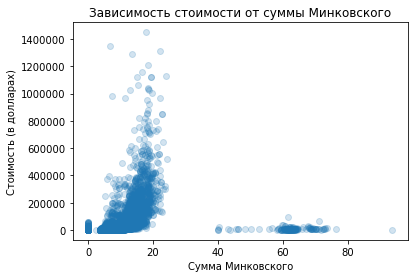

In [143]:
plt.scatter(train['sum_of_minkowski'], train['total_sales_price'], alpha=0.2)
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость стоимости от суммы Минковского')
plt.show()


(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

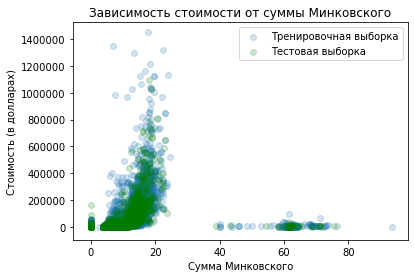

In [147]:
plt.scatter(train['sum_of_minkowski'], train['total_sales_price'], alpha=0.2)
plt.scatter(test['sum_of_minkowski'], test['total_sales_price'], alpha=0.2, color='green')
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость стоимости от суммы Минковского')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'])
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [149]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train[['sum_of_minkowski']], train[['total_sales_price']])
test['predicted_price'] = knn.predict(test[['sum_of_minkowski']])
distances, indexes = knn.kneighbors(test[['sum_of_minkowski']])
train_neighbors = train.iloc[indexes.ravel()].reset_index(drop=True)
test['distance'] = distances.ravel()
test

,sum_of_minkowski,total_sales_price,predicted_price,distance
167888,6.931338,3678,3692.0,0.000000
53087,8.126411,3380,5170.0,0.000047
168078,8.598648,9013,3500.0,0.000064
194939,5.616430,906,854.0,0.000000
58943,6.630033,2434,1788.0,0.000000
...,...,...,...,...
166019,5.531336,976,984.0,0.000000
163794,5.577405,638,972.0,0.000000
200351,5.646226,998,1070.0,0.000000
32163,8.830598,9409,9454.0,0.000000


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [155]:
test['price_difference'] = (abs(test['total_sales_price'] - train_neighbors['total_sales_price']) / train_neighbors['total_sales_price']) * 100
test['price_difference'].mean()

423.24282198835334

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diamonds = pd.read_csv('diamonds.csv')
cat_features = ['cut', 'color']
ohe = OneHotEncoder()
ohe.fit(diamonds[cat_features])
X = ohe.transform(diamonds[cat_features])


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, diamonds['total_sales_price'], test_size=0.2, random_state=42)


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [165]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [167]:
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

760107914.63695

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)

Проделав эксперимент, можем сделать вывод, что парой, дающей наименьший `MSE` являются огранка и цвет бриллианта.